In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the uploaded files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)

train.head()


Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Drop columns with too many missing values
missing = train.isnull().sum()
missing_cols = missing[missing > 100].index.tolist()
train = train.drop(columns=missing_cols)
test = test.drop(columns=missing_cols)

# Fill remaining missing values
train = train.fillna(train.median(numeric_only=True))
test = test.fillna(test.median(numeric_only=True))


In [6]:
# Select numerical features only
numerical_features = train.select_dtypes(include=[np.number])
numerical_features = numerical_features.drop(columns=["Id", "SalePrice"])
features = numerical_features.columns.tolist()

X = train[features]
y = train["SalePrice"]



In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Validation RMSE:", rmse)


Validation RMSE: 36476.17060746451


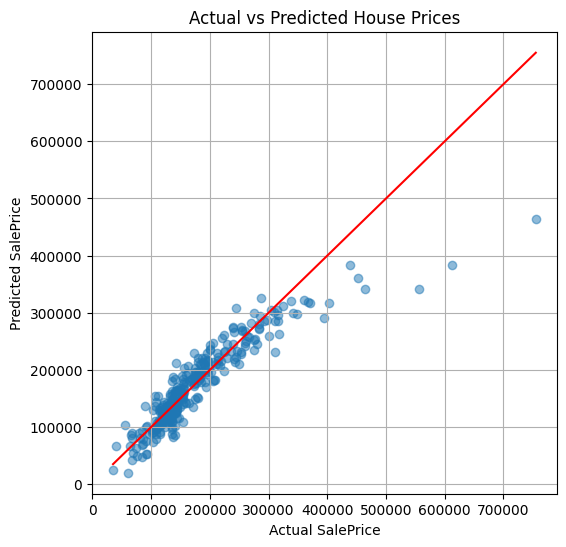

In [11]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted House Prices")
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # perfect line
plt.grid(True)
plt.show()


In [12]:
test_preds = model.predict(test[features])

In [13]:
# Step 3: Prepare the submission file
submission = sample_submission.copy()
submission["SalePrice"] = test_preds
submission.to_csv("my_submission.csv", index=False)


In [15]:
# ✅ Import files module for download
from google.colab import files

# ✅ Download the submission file
files.download("my_submission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
# Step 1: Imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from google.colab import files

# Step 2: Upload files again (if needed)
# from google.colab import files
# uploaded = files.upload()

# Step 3: Load datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Step 4: Clean data
threshold = 0.2
missing_percent = train.isnull().sum() / len(train)
cols_to_drop = missing_percent[missing_percent > threshold].index.tolist()
train_cleaned = train.drop(columns=cols_to_drop)
test_cleaned = test.drop(columns=cols_to_drop)

train_cleaned = train_cleaned.drop(columns=["Id"])
test_cleaned = test_cleaned.drop(columns=["Id"])

train_cleaned = train_cleaned.fillna(train_cleaned.median(numeric_only=True))
test_cleaned = test_cleaned.fillna(test_cleaned.median(numeric_only=True))

train_numerical = train_cleaned.select_dtypes(include=[np.number])
test_numerical = test_cleaned.select_dtypes(include=[np.number])

# Step 5: Model training
X = train_numerical.drop(columns=["SalePrice"])
y = train_numerical["SalePrice"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict
test_preds = model.predict(test_numerical[X.columns])
submission_cleaned = sample_submission.copy()
submission_cleaned["SalePrice"] = test_preds

# Step 7: Save and download
submission_cleaned.to_csv("my_submission_cleaned.csv", index=False)
files.download("my_submission_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

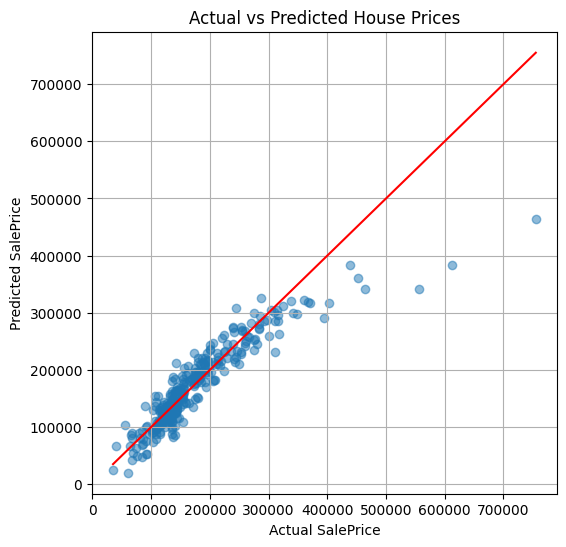

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted House Prices")
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')
plt.grid(True)
plt.show()


In [20]:
# Step 1: Install XGBoost (run only once)
!pip install xgboost

# Step 2: Imports
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Step 3: Define and train model
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred_xgb = xgb_model.predict(X_val)

# Calculate metrics
r2 = r2_score(y_val, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
mae = mean_absolute_error(y_val, y_pred_xgb)

# Show results
print(f"✅ R² Score: {r2:.4f}")
print(f"📉 RMSE: ${rmse:,.2f}")
print(f"📉 MAE: ${mae:,.2f}")


✅ R² Score: 0.9065
📉 RMSE: $26,785.97
📉 MAE: $16,711.27


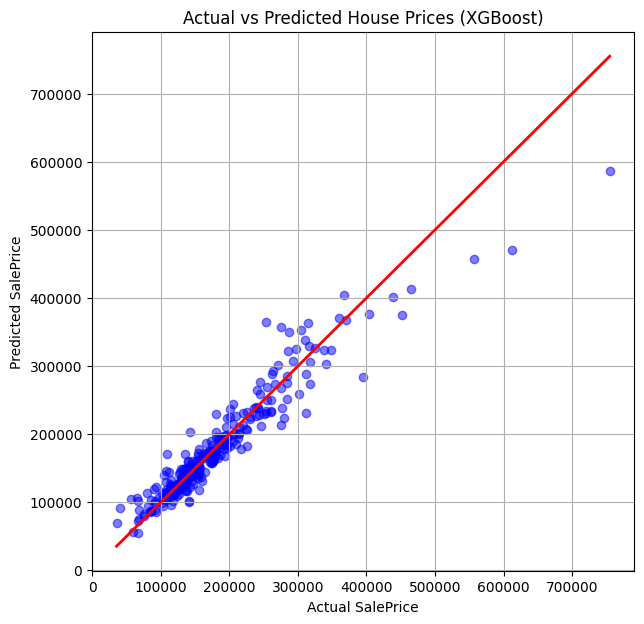

In [21]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(7, 7))
plt.scatter(y_val, y_pred_xgb, alpha=0.5, color='blue')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linewidth=2)  # perfect prediction line
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted House Prices (XGBoost)")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


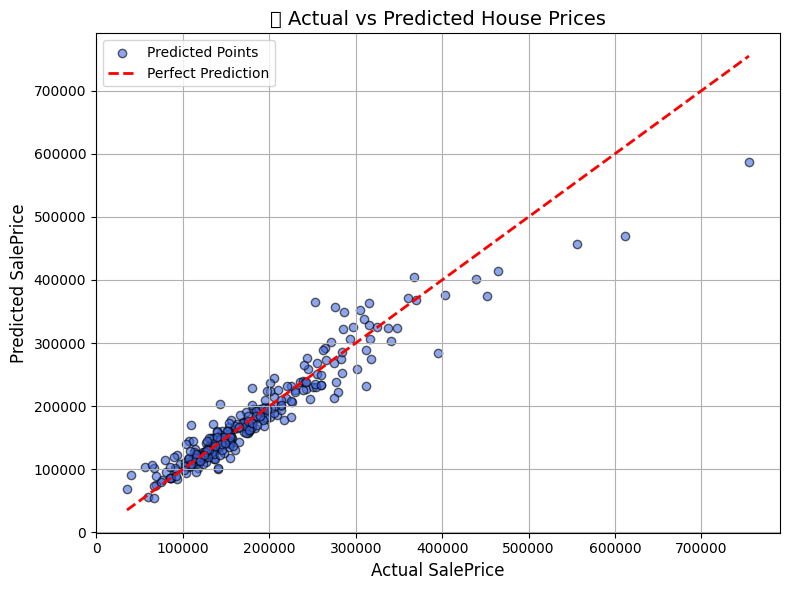

In [22]:
import matplotlib.pyplot as plt

# Standard accuracy graph for regression models
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_xgb, alpha=0.6, color='royalblue', edgecolor='k', label='Predicted Points')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--', lw=2, label='Perfect Prediction')

plt.title("📊 Actual vs Predicted House Prices", fontsize=14)
plt.xlabel("Actual SalePrice", fontsize=12)
plt.ylabel("Predicted SalePrice", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


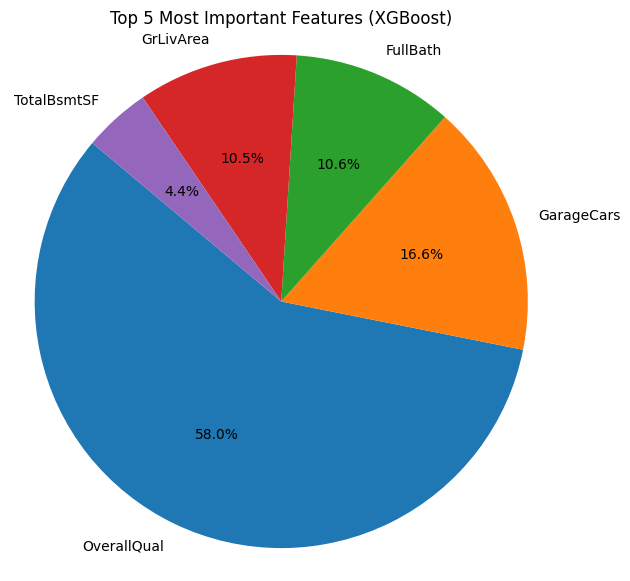

In [23]:
# Get feature importance from XGBoost
importances = xgb_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(5)

# Plot Pie Chart
plt.figure(figsize=(7,7))
plt.pie(importance_df['Importance'], labels=importance_df['Feature'], autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Most Important Features (XGBoost)")
plt.axis('equal')  # Equal aspect ratio ensures pie is round
plt.show()


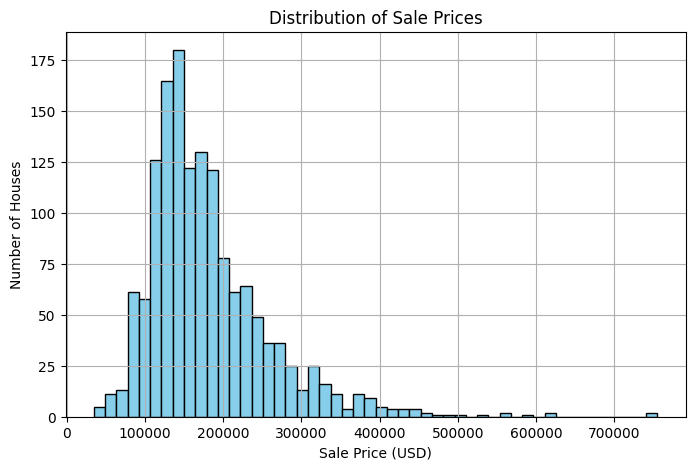

In [25]:
# Histogram of Sale Prices
# Shows the distribution of house prices.
plt.figure(figsize=(8,5))
plt.hist(train["SalePrice"], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price (USD)")
plt.ylabel("Number of Houses")
plt.grid(True)
plt.show()


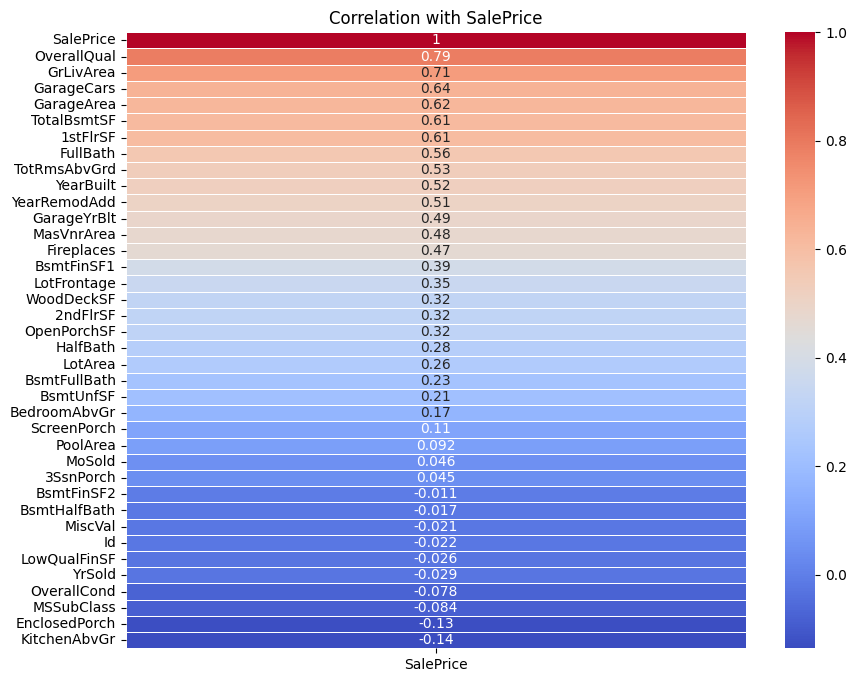

In [28]:
# Correlation Heatmap
# Shows which features are most related to price
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = train.select_dtypes(include=['number'])

# Compute correlation with SalePrice
corr = numeric_data.corr()

# Plot heatmap of top correlated features with SalePrice
plt.figure(figsize=(10, 8))
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation with SalePrice")
plt.show()



/tmp/ipython-input-29-3675781032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train['OverallQual'], y=train['SalePrice'], palette="Blues")


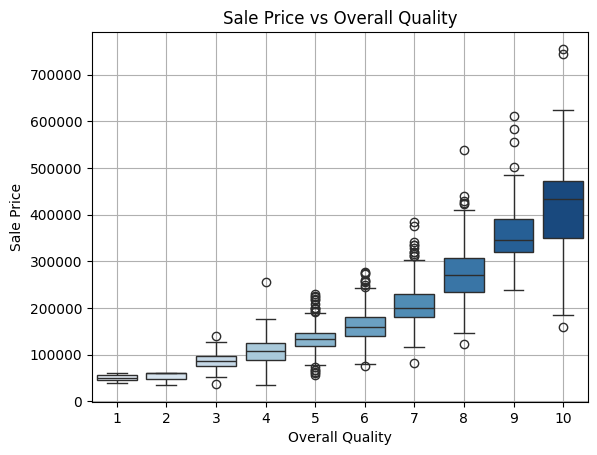

In [29]:
#  Box Plot of Quality vs Price
sns.boxplot(x=train['OverallQual'], y=train['SalePrice'], palette="Blues")
plt.title("Sale Price vs Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.grid(True)
plt.show()


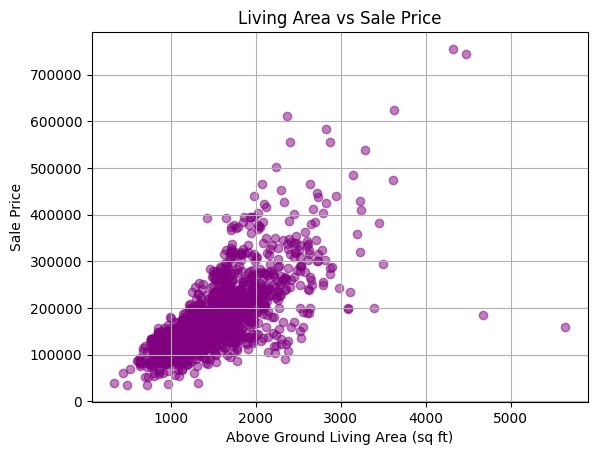

In [30]:
# Scatter Plot: Living Area vs Price
plt.scatter(train['GrLivArea'], train['SalePrice'], alpha=0.5, color='purple')
plt.title("Living Area vs Sale Price")
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.grid(True)
plt.show()


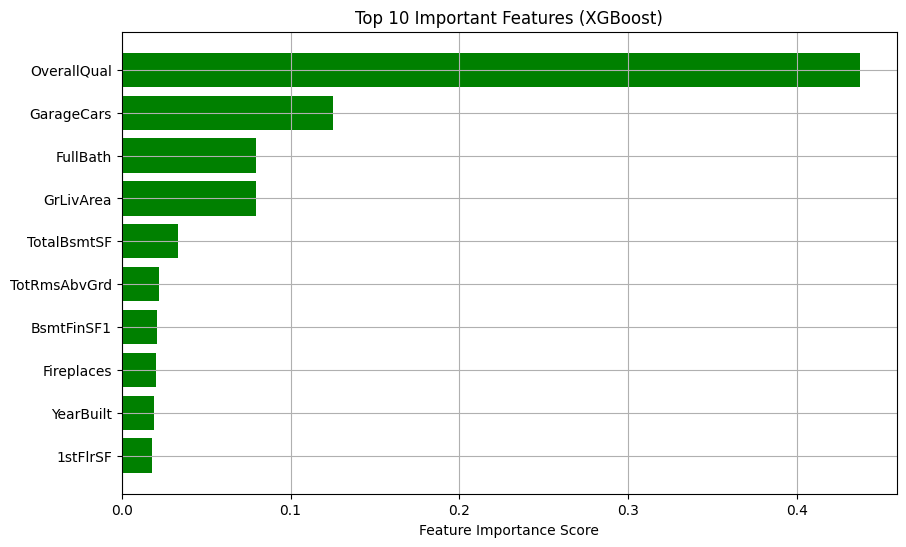

In [31]:
# Feature Importance (Bar Chart from XGBoost)
importances = xgb_model.feature_importances_
sorted_idx = np.argsort(importances)[-10:]

plt.figure(figsize=(10,6))
plt.barh(X.columns[sorted_idx], importances[sorted_idx], color='green')
plt.xlabel("Feature Importance Score")
plt.title("Top 10 Important Features (XGBoost)")
plt.grid(True)
plt.show()


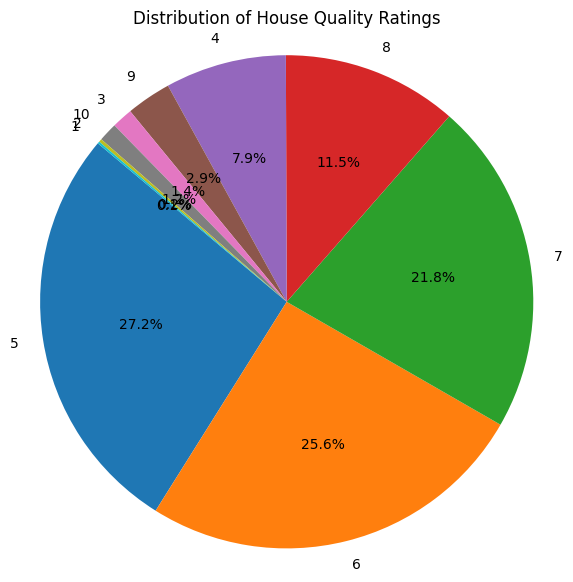

In [32]:
#  Pie Chart: Quality Rating Proportion
qual_counts = train['OverallQual'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(qual_counts, labels=qual_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of House Quality Ratings")
plt.axis('equal')
plt.show()



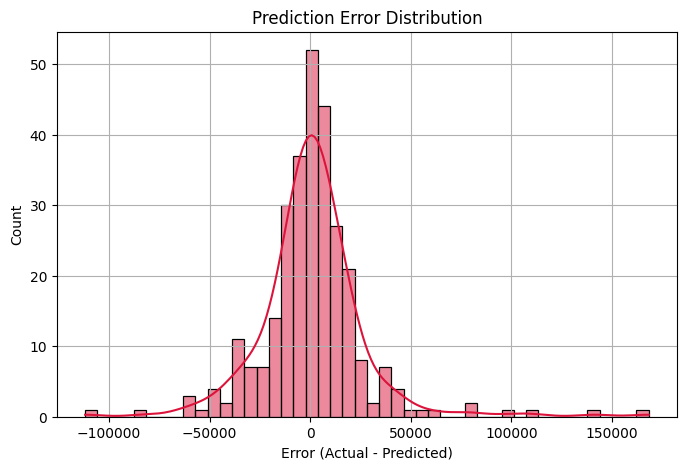

In [33]:
#Residual Plot (Prediction Errors
errors = y_val - y_pred_xgb
plt.figure(figsize=(8,5))
sns.histplot(errors, kde=True, color='crimson')
plt.title("Prediction Error Distribution")
plt.xlabel("Error (Actual - Predicted)")
plt.grid(True)
plt.show()
